In [1]:
# Importamos las librerías necesarías y fijamos la semilla
import numpy as np
import random
import scipy
from scipy.stats import uniform as spuniform
import matplotlib.pyplot as plt

from matplotlib import pyplot
import math
import statistics
import pandas as pd
import time

from matplotlib import colors

np.random.seed(11)

In [4]:
def grafo(NP,X,Y):
    P = []
    C = np.zeros((NP,NP))
    for i in range(NP):
        P.append(np.array([np.random.uniform(0,X),np.random.uniform(0,Y)]))
    for i in range(NP):
        for j in range(NP):
            C[i,j] = np.linalg.norm(P[i]-P[j])
    return P , C

In [31]:
ruta = [2,1,0,4,5,3]
def costo(ruta,distancias):
    return np.sum(distancias[ruta[i],ruta[i+1]] for i in range(len(ruta)-1))

In [33]:
P,C = grafo(10,1,15)
costo(ruta,C)

/tmp/ipykernel_73/142016910.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(distancias[ruta[i],ruta[i+1]] for i in range(len(ruta)-1))


27.72528458682488

In [46]:
def SimAnn(mapa,distancias,sigma0,C,beta,pasos=10**4):
    U = np.random.uniform(size = pasos) #se define las uniformes para cada paso
    sigmas = [sigma0]
    w = [costo(sigma0,distancias)]
    conteo=0
    provincias = [i for i in range(len(mapa)) if i != sigma0[0] and i != sigma0[-1]]
    for i in range(pasos-1):
        sigma= sigmas[i] #configuración anterior
        betan= beta(i,C) #definimos beta_n segun la función dada
        #sacamos un vecino
        tau = np.random.choice(provincias,len(sigma0)-2,False).tolist()
        tau.append(sigma0[-1])
        tau.insert(0,sigma0[0])
        ws = costo(sigma,distancias) #costo anterior
        wt = costo(tau,distancias) #costo vecino
        dif = np.exp(-betan*(wt-ws))
        #print("betan:",betan,"ws:",ws,"wt:",wt,"dif:",dif)
        if U[i] <= min(dif,1):
            conteo +=1
            sigmas.append(tau)
            w.append(costo(tau,distancias))
        else:
            sigmas.append(sigma)
            w.append(costo(sigma,distancias))
    print("transiciones hechas:",conteo)
    return sigmas[len(sigmas)-1] , w[len(sigmas)-1], w , sigmas



In [27]:
def beta2(n,C):
    return n/C

def beta3(n,C):
    return (n**2)/C

def beta4(n,C):
    return np.exp(n)/C

In [75]:
P, C  = grafo(25, 1, 1)
ruta = [2,1,0,4,5,3]
pasos = 10**4
s,w,W,S = SimAnn(P,C,ruta,10,beta2,pasos)
S

/tmp/ipykernel_73/142016910.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(distancias[ruta[i],ruta[i+1]] for i in range(len(ruta)-1))
transiciones hechas: 32


[[2, 1, 0, 4, 5, 3],
 [2, 13, 17, 12, 0, 3],
 [2, 13, 19, 17, 22, 3],
 [2, 0, 14, 16, 15, 3],
 [2, 18, 19, 21, 13, 3],
 [2, 24, 22, 9, 13, 3],
 [2, 24, 22, 9, 13, 3],
 [2, 23, 5, 22, 15, 3],
 [2, 23, 5, 22, 15, 3],
 [2, 23, 5, 22, 15, 3],
 [2, 23, 5, 22, 15, 3],
 [2, 23, 5, 22, 15, 3],
 [2, 9, 22, 20, 14, 3],
 [2, 9, 22, 20, 14, 3],
 [2, 9, 22, 20, 14, 3],
 [2, 9, 22, 20, 14, 3],
 [2, 9, 22, 20, 14, 3],
 [2, 20, 0, 19, 22, 3],
 [2, 4, 21, 10, 20, 3],
 [2, 1, 12, 8, 14, 3],
 [2, 1, 12, 8, 14, 3],
 [2, 1, 12, 8, 14, 3],
 [2, 4, 6, 12, 7, 3],
 [2, 9, 24, 7, 11, 3],
 [2, 7, 15, 8, 12, 3],
 [2, 7, 15, 8, 12, 3],
 [2, 23, 6, 24, 8, 3],
 [2, 24, 15, 11, 1, 3],
 [2, 19, 6, 23, 20, 3],
 [2, 19, 6, 23, 20, 3],
 [2, 11, 24, 20, 1, 3],
 [2, 11, 24, 20, 1, 3],
 [2, 11, 24, 20, 1, 3],
 [2, 11, 24, 20, 1, 3],
 [2, 11, 24, 20, 1, 3],
 [2, 11, 24, 20, 1, 3],
 [2, 11, 24, 20, 1, 3],
 [2, 11, 24, 20, 1, 3],
 [2, 1, 11, 7, 17, 3],
 [2, 1, 11, 7, 17, 3],
 [2, 1, 11, 7, 17, 3],
 [2, 18, 8, 20, 19, 3],
 [2, 

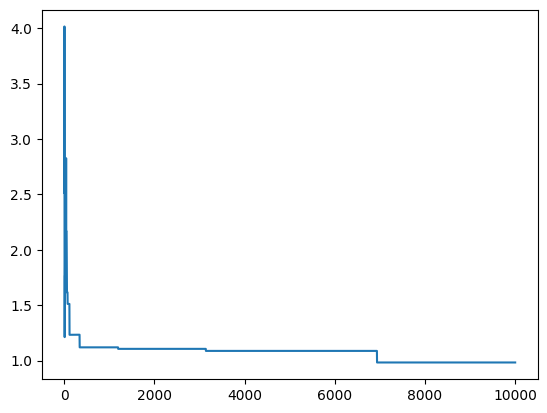

In [76]:
X = range(pasos)
plt.plot(X,W)

In [77]:
#sigma una configuración como secuencia de vértices
def plotear(sigma,ciudades):
    plt.figure()
    plt.scatter([ciudades[i][0] for i in range(len(P))],[ciudades[i][1] for i in range(len(P))], marker="o")
    for i in range(len(sigma)-1):
        plt.plot([ciudades[sigma[i]][0],ciudades[sigma[i+1]][0]],[ciudades[sigma[i]][1],ciudades[sigma[i+1]][1]],'k-')

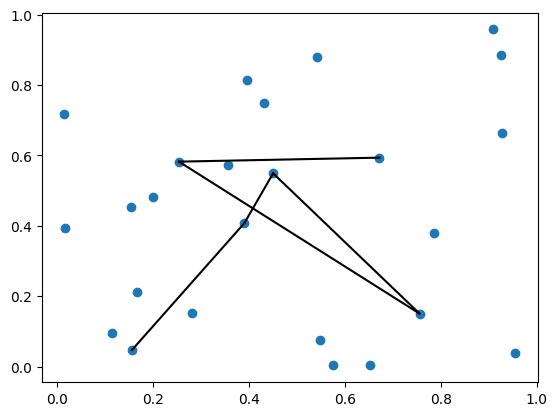

In [78]:
plotear(S[50],P)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=45a688e7-b6e2-4e4a-b3a9-c39f5b699a07' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>